In [21]:
import sqlite3
import pandas as pd
import fakeInjectionPipeline as fip
import matplotlib.pyplot as plt
from scipy.stats import norm
from scipy.stats import sigmaclip

In [17]:
def get_df(config):
    flux_db_patch = f'./data/patch_0to6/diff/{config}/detection/detection.sqlite'
    conn = sqlite3.connect(flux_db_patch)
    full_query = (
        'SELECT base_PsfFlux_instFlux, injected_instFlux, base_PsfFlux_instFluxErr, '
        'fake_mag, matched_status FROM fake_src WHERE fake_mag = 20')
    diaSrc = pd.read_sql_query(full_query, conn)
    detected_fake = diaSrc.loc[diaSrc.matched_status.astype(bool)]
    df = (detected_fake.base_PsfFlux_instFlux - detected_fake.injected_instFlux) / detected_fake.base_PsfFlux_instFluxErr
    clipped, _, _ = stats.sigmaclip(df.to_numpy())
    return clipped

In [32]:
config_ls = ['al_default', 'al_preconv', 'al_decorr',
             'al_convSci', 'al_convSciDecorr', 'al_spatial4',
             'al_spatial4Pca', 'zogy_55']
config_type_ls = ['default', 'preconv', 'decorr',
                  'convSci', 'convSciDecorr', 'spatial4',
                  'spatial4Pca', 'ZOGY']
flux_dict = {}
for cf_type in config_ls:
    flux_dict[cf_type] = get_df(cf_type)

In [19]:
norm_x = np.arange(-5, 5, 0.1)
norm_y = norm.pdf(norm_x)
norm_cdf = norm(loc=0, scale=1).cdf

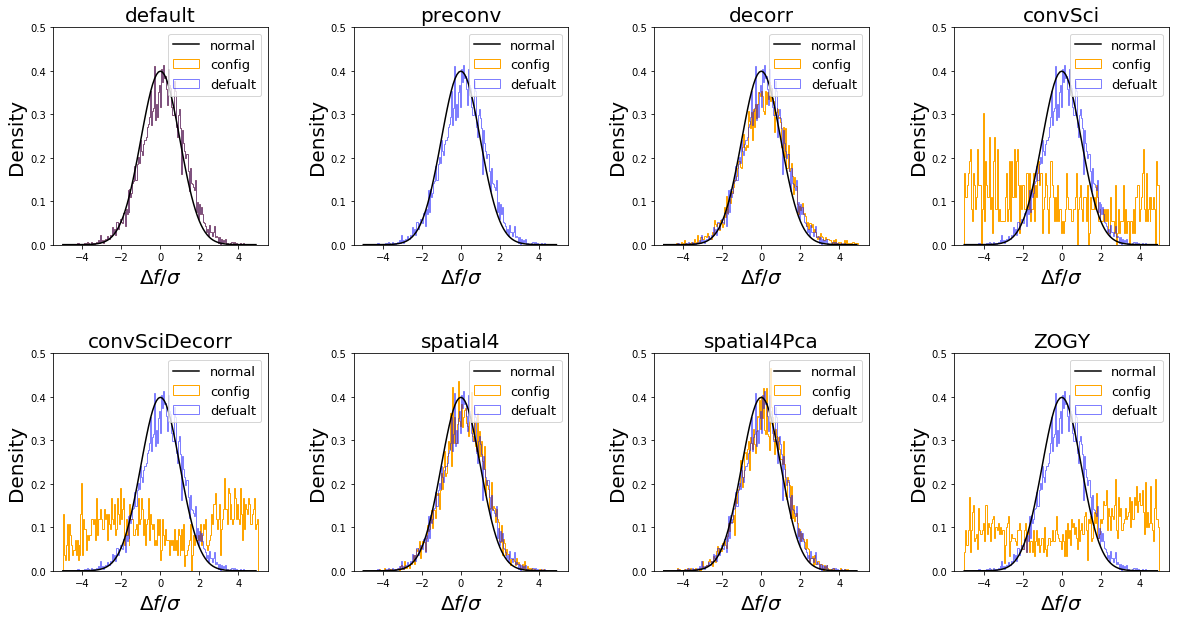

In [59]:
bins = np.linspace(-5, 5, 200)
fig, ax = plt.subplots(2, 4, figsize=(20, 10))
fig.subplots_adjust(hspace=0.5, wspace=0.4)
ax_ls = ax.flat
for i, cf_type in enumerate(config_ls):
    config = config_type_ls[i]
    df =  flux_dict[cf_type]   
    ax_ls[i].hist(df ,density=True, bins=bins,color='orange', histtype='step', label='config')
    ax_ls[i].hist(flux_dict['al_default'] ,density=True,
                  bins=bins,color='blue', alpha=0.5, histtype='step', label='defualt')
    ax_ls[i].plot(norm_x, norm_y, color='k', label='normal')
    ax_ls[i].set_ylim((0, 0.5))
    ax_ls[i].set_title(f'{config}', size=20)
    ax_ls[i].set_xlabel('$\Delta f / \sigma$', size=20)
    ax_ls[i].set_ylabel('Density', size=20)
    ax_ls[i].legend(fontsize=13)
plt.savefig('config.pdf', dpi=100)